In [145]:
import os
from pathlib import Path
import tensorflow as tf
import pandas as pd
import tensorflow as tf
from PIL import Image
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
tf.__version__

'2.0.0-dev20190313'

In [ ]:
# Панда и енот
# urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
# window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

## Обработка загрузки

In [38]:
panda_df = pd.read_csv('panda.csv',header=None,names=['links'])
enot_df = pd.read_csv('enot.csv',header=None,names=['links'])

In [39]:
panda_df.head(2),enot_df.head(2)

(                                               links
 0            https://hh.ru/employer-logo/2808240.png
 1  https://ichef.bbci.co.uk/news/660/cpsprodpb/2F...,
                                                links
 0  https://xakep.ru/wp-content/uploads/2018/05/16...
 1   https://online-teacher.ru/image/english/enot.jpg)

In [17]:
p_path = Path('./panda')
e_path = Path('./enot')

In [35]:
if not p_path.is_dir():
    p_path.mkdir()
if not e_path.is_dir():
    e_path.mkdir()

In [56]:
for i in panda_df.iterrows():
    image_url=i[1]['links']
    img_data = requests.get(image_url).content
    image_path=p_path/(str(i[0])+'.jpg')
    with open(image_path, 'wb') as handler:
        handler.write(img_data)

In [69]:
for i in enot_df.iterrows():
    image_url=i[1]['links']
    try:
        img_data = requests.get(image_url).content
    except:
        print('Bad link')
    image_path=e_path/(str(i[0])+'.jpg')
    with open(image_path, 'wb') as handler:
        handler.write(img_data)

Bad link
Bad link
Bad link
Bad link


In [ ]:
# Генерация датасета (количество примеров незначительное - можно без генератора)

In [109]:
x_train = np.empty(shape=(1,224,224,3))[:0]
for file in p_path.iterdir():
    try:
        Img = Image.open(file)
        x_train = np.append(x_train,np.expand_dims(np.array(Img.resize(size=(224,224))),0),axis=0)
    except:
        print('Bad file',file)
y_train = np.zeros(x_train.shape[0],dtype=np.int16)

Bad file panda/63.jpg
Bad file panda/71.jpg
Bad file panda/66.jpg
Bad file panda/25.jpg
Bad file panda/86.jpg
Bad file panda/0.jpg


In [112]:
for file in e_path.iterdir():
    try:
        Img = Image.open(file)
        x_train = np.append(x_train,np.expand_dims(np.array(Img.resize(size=(224,224))),0),axis=0)
    except:
        print('Bad file',file)

Bad file enot/16.jpg
Bad file enot/32.jpg
Bad file enot/81.jpg
Bad file enot/2.jpg
Bad file enot/1.jpg
Bad file enot/90.jpg


In [122]:
y_train=np.append(y_train,np.ones(x_train.shape[0]-y_train.shape[0]))

In [132]:
# Проверим панд

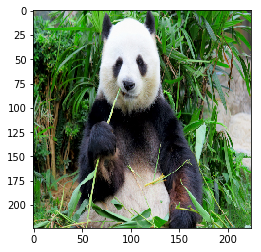

In [131]:
plt.imshow(x_train[12].astype(np.uint8))

In [133]:
# Проверим енотов

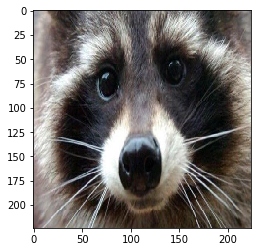

In [134]:
plt.imshow(x_train[102].astype(np.uint8))

In [214]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False, 
                                               weights='imagenet')

In [215]:
base_model.trainable = False

In [216]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalizationV1) (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [217]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [218]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=3e-4), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [219]:
X_train,X_test,Y_train,Y_test = train_test_split(x_train/255,y_train,test_size=0.2,shuffle=True,random_state=2121)

In [220]:
hist = model.fit(X_train,Y_train,batch_size=12,epochs=10,validation_data=(X_test,Y_test),verbose=1)

Train on 150 samples, validate on 38 samples
Epoch 1/10
150/150 [==============================] - 9s 58ms/sample - loss: 0.6481 - accuracy: 0.6200 - val_loss: 0.6538 - val_accuracy: 0.6842
Epoch 2/10
150/150 [==============================] - 6s 41ms/sample - loss: 0.5706 - accuracy: 0.7267 - val_loss: 0.5666 - val_accuracy: 0.7895
Epoch 3/10
150/150 [==============================] - 6s 41ms/sample - loss: 0.4914 - accuracy: 0.8133 - val_loss: 0.4950 - val_accuracy: 0.8158
Epoch 4/10
150/150 [==============================] - 6s 40ms/sample - loss: 0.4559 - accuracy: 0.8400 - val_loss: 0.4342 - val_accuracy: 0.8158
Epoch 5/10
150/150 [==============================] - 6s 41ms/sample - loss: 0.4059 - accuracy: 0.8800 - val_loss: 0.3815 - val_accuracy: 0.8947
Epoch 6/10
150/150 [==============================] - 6s 41ms/sample - loss: 0.3995 - accuracy: 0.8400 - val_loss: 0.3391 - val_accuracy: 0.8947
Epoch 7/10
150/150 [==============================] - 6s 42ms/sample - loss: 0.3392 -

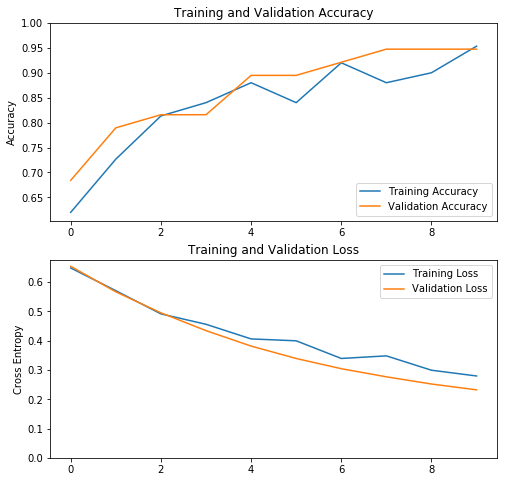

In [221]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

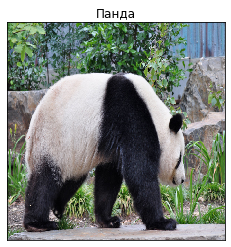

In [222]:
N=7
fig = plt.imshow(X_train[N])
fig.axes.get_yaxis().set_visible(False) 
fig.axes.get_xaxis().set_visible(False) 
if (model(np.expand_dims(X_train[N],0).astype(np.float32)).numpy()>0.5)[0][0]:
    plt.title(str('Енот'));
else:
    plt.title(str('Панда'));

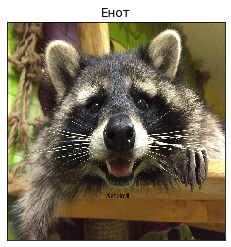

In [223]:
N=0
fig = plt.imshow(X_train[N])
fig.axes.get_yaxis().set_visible(False) 
fig.axes.get_xaxis().set_visible(False) 
if (model(np.expand_dims(X_train[N],0).astype(np.float32)).numpy()>0.5)[0][0]:
    plt.title(str('Енот'));
else:
    plt.title(str('Панда'));

In [228]:
# Cкачаем новое изображение и проверим результат

In [224]:
img_test = np.expand_dims(np.array(Image.open('panda.jpg').resize(size=(224,224))),0)/255

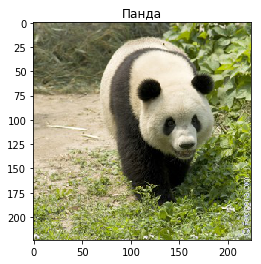

In [227]:
fig = plt.imshow(img_test[0])
if (model((img_test).astype(np.float32)).numpy()>0.5)[0][0]:
    plt.title(str('Енот'));
else:
    plt.title(str('Панда'));